<h2>Startup Success Rate Prediction</h2>


<h3>Project Name: IdeoScore</h3>
<p>The objective of the project is to predict whether a startup which is currently operating turn into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shutdown.</p>

<h4>Dataset Source</h4>
<ul>
<li>Link - <a href="https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase">https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase</a></li>
<li>This dataset contains 66396 Rows and 14 columns</li>
</ul>

In [2]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("./data/big_startup_success_dataset.csv")
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


<h3>dataset Overview</h3>

<ul>
  <li>permalink</li>
  <li>Name of startup</li>
  <li>homePageUrl : website link of the startup</li>
  <li>category : category of the startup</li>
  <li>funding_total_USD : total funding amount in USD</li>
  <li>status : (operational status)</li>
  <li>country Code : country code of the startup</li>
  <li>State Code : state code of the startup</li>
  <li>Region : Region of the startup</li>
  <li>City : City of the startup in given region</li>
  <li>Funding Round : How many times Startup has raised funding</li>
  <li>Founded_At : year the startup was founded</li>
  <li>First_Funding_At : year the startup received its first funding</li>
  <li>Last_Funding_At : year the startup received its last funding</li>
</ul>

<h2> Exploratory Data Analysis </h2>

<h3> Handling Missing Values </h3>

In [5]:
df.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

Let's Visulaize the missing values in the dataset
<ul>
  <li>See if we find a pattern in the missing values, such as a part of the dataset where values are missing for many columns at once.
</li>
</ul>

<Axes: >

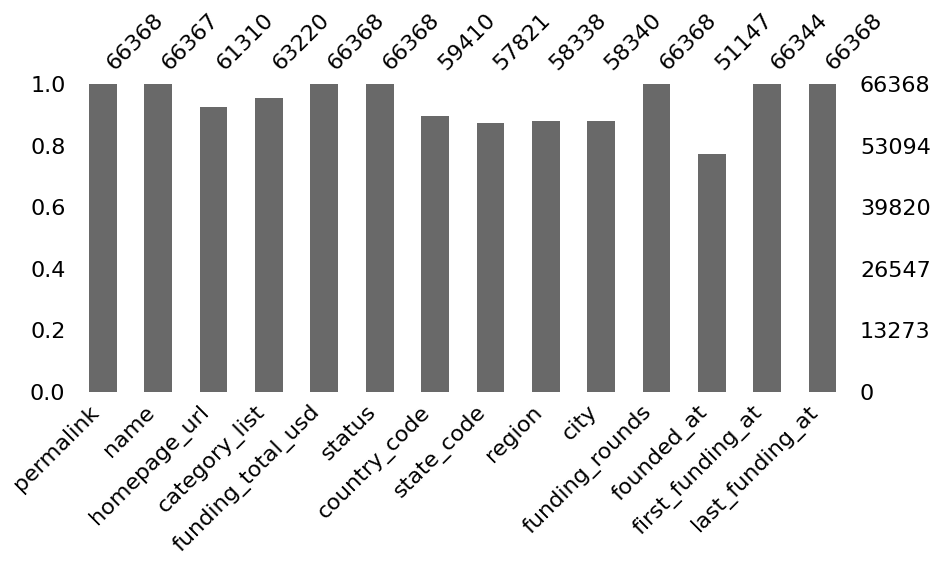

In [6]:
msno.bar(df, figsize=(10,4))

<Axes: >

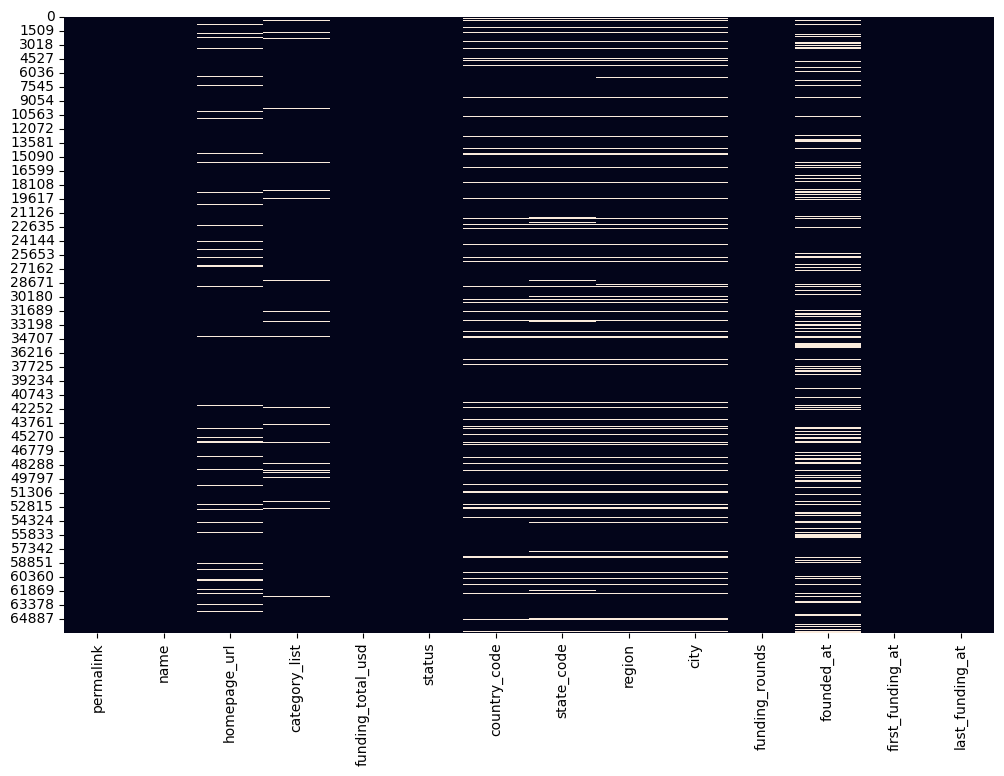

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False)


We can't distinguish a clear interval of rows with missing values, nor a clear relation, the only thing that we can appreciate is that almost all the rows with a missing value in the country_code column, also have missing values in state, region, and city.



First In The category list we have almost 5000 rows with missing values, we can replace them with "Unknown" or "Other" (here i am taking as Other)

-> For the colums which missing values in one of the address columns (country_code, state_code, region, city), this makes sense because if we don't know the country, we can't know the state, region or city. So we can replace all the missing values With the random Sample Imputation technique.

--> Finally, we have the column with the most missing data, having only about 70% of the data when it was founded. We could replace those values by first_funding_at or extract the years (which is what we are looking for), and apply a fill using Random Sample Imputation as well

Let's Visulaize the Column with Status for the Prediction

Text(0, 0.5, 'Number of startups')

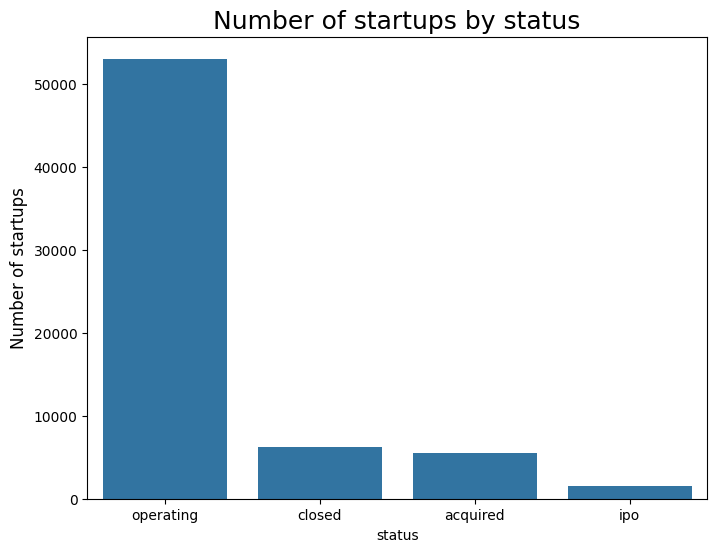

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['status'].value_counts().index,y=df['status'].value_counts())
plt.title('Number of startups by status',size=18)
plt.ylabel('Number of startups',size=12)

Let's Visualize the Funding rounds of the startups

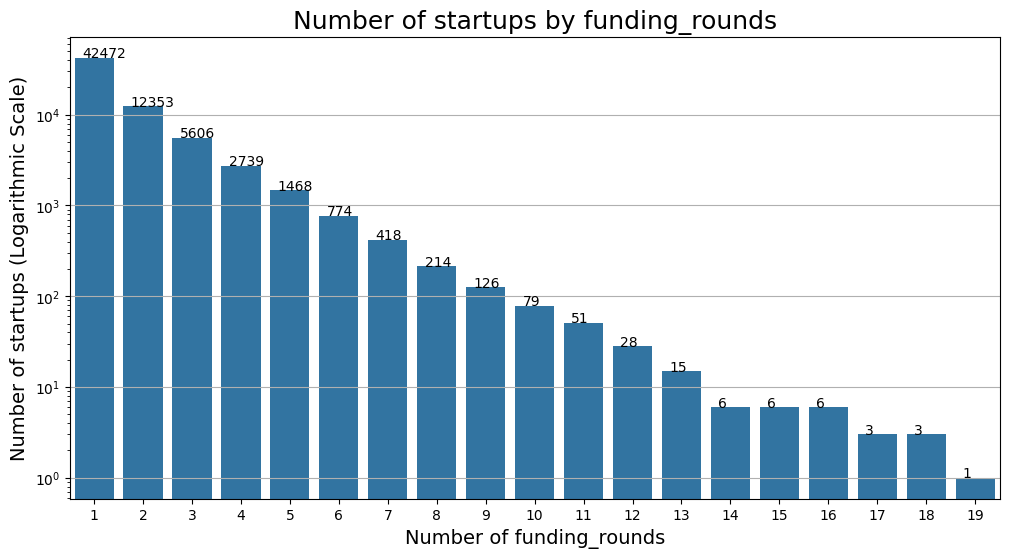

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['funding_rounds'].value_counts().index, y=df['funding_rounds'].value_counts())
plt.title('Number of startups by funding_rounds',size=18)
plt.ylabel('Number of startups (Logarithmic Scale)',size=14)
plt.xlabel('Number of funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(df['funding_rounds'].value_counts().index,df['funding_rounds'].value_counts())

In [10]:
df['category_list'].value_counts()

category_list
Software                                                                                                                                                                                                                                    3995
Biotechnology                                                                                                                                                                                                                               3615
E-Commerce                                                                                                                                                                                                                                  1332
Mobile                                                                                                                                                                                                                                      1177
Clean Technology      

We have Too many categories in the category_list column, This is due to the fact that many startups have multiple categories, we can reduce the number of categories by taking only the first category of each startup.

1) take the first category of each startup
2) if null than replace with "Other"

<h3> Data Wrangling </h3>

filling and transforming missing values in funding_total_usd

In [12]:
# Transforming funding_total_usd in float, filling missing values
def convert_to_float(x):
  return np.nan if x == '-' else float(x)

df['funding_total_usd'] = df['funding_total_usd'].apply(convert_to_float)
df['funding_total_usd'].isna().sum()

np.int64(12785)

In [15]:
df['funding_total_usd'].aggregate([np.nanmean,np.nanmedian,np.nanstd])

nanmean      1.847860e+07
nanmedian    2.000000e+06
nanstd       1.880133e+08
Name: funding_total_usd, dtype: float64

Let's see the estimated location and the estimated variability of the funding_total_usd grouping by
funding_rounds.

In [16]:
funding_rounds_group = df.groupby('funding_rounds')['funding_total_usd'].aggregate(['count',np.nanmean,np.nanmedian,np.nanstd])
funding_rounds_group.head()

,count,nanmean,nanmedian,nanstd
funding_rounds,,,,
1,30789,1.007059e+07,896000.0,1.382065e+08
2,11477,1.404059e+07,2870000.0,9.023609e+07
3,5447,2.289590e+07,7500000.0,8.833278e+07
4,2697,3.400935e+07,14650000.0,7.141552e+07
5,1456,7.170403e+07,25322724.5,7.926982e+08


So now we will fill the missing values with the mean of the corresponding funding_rounds.

In [17]:
funding_filled = []

for h,i in enumerate(df['funding_total_usd']):
    if np.isnan(i):
        i = int(funding_rounds_group.loc[df['funding_rounds'].iloc[h],'nanmean'])
        funding_filled.append(i)
    else:
        funding_filled.append(int(i))
    
df['funding_filled'] = funding_filled
df['funding_filled'].isnull().sum()

np.int64(0)